In [1]:
import pickle as pkl
from glob import glob
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def load_data(rootpath):
    results = []
    for filen in glob(rootpath + "**/*.pkl",recursive=True):
        #Ignore the config files
        if filen[-10:]!='config.pkl':
            with open(filen, 'rb') as file:
                item = pkl.load(file)
                item['filename'] = filen
                item['id'] = len(results)
                results.append(item)
    return results

In [3]:
ode1 = load_data('../Data/ode_results/drag_ode1/')
ode2 = load_data('../Data/ode_results/drag_ode2/')
ode3 = load_data('../Data/ode_results/drag_ode3/')
ode4 = load_data('../Data/ode_results/drag_ode4/')

In [4]:
for i in range(len(ode1)):
    ode1[i]['ode']='ode1'
for i in range(len(ode2)):
    ode2[i]['ode']='ode2'
for i in range(len(ode3)):
    ode3[i]['ode']='ode3'
for i in range(len(ode4)):
    ode4[i]['ode']='ode4'
all_results = ode1 + ode2 + ode3 + ode4

In [21]:
all_results_dict = {ode:{
                        initcond:{
                            predtype:None
                            for predtype in {'continue','random'}
                            }
                        for initcond in {'activ_f', 'relax'}
                        }
                    for ode in {'ode1', 'ode2', 'ode3', 'ode4'}}
for item in all_results:
    all_results_dict[item['ode']][item['experiment'][1]][item['experiment'][2]] = item

In [23]:
print(all_results[0])
print(all_results_dict['ode1']['activ_f']['random']['opt_parameters'])

{'continue': [1.460010477444257, 1.2700091139413416, 1.7100122715271482, 1.4000100468643382, 0.34000243995274104, 0.870006243408568, 0.2700019376095497, 0.3900027987693875, 0.7300052387220717, 0.8200058845920921, 1.1600083245448332, 1.0200073198582231, 0.7100050951955836, 0.4600033011126925, 1.1300081092547316, 0.20000143526635838, 2.9200209548882867, 0.6400045928521649, 2.670019160805623, 0.08000057410652062, 0.07000050234319133, 1.6000114821306397, 0.4800034446391237, 0.1900013635029154, 1.7300124150538068, 1.0500075351483247, 1.9300138503201651, 0.780005597538775, 0.25000179408289114, 0.6900049516689251, 0.9300066739886006, 0.23000165055623256], 'random': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'lyapunov': [-0.007141415856095507, -0.011653559311139875, -0.01038034521388807, -0.011837957794545932, -0.0025076123420380942, 0.00046845484185758753, -0.0073400462782932

In [15]:
def get_orig_results():
    #Load the data
    oresults = []
    #Change this to wherever you have the data
    PATH = "../Data/results/all_results/"
    for filen in glob(PATH + "**/*.pkl",recursive=True):
        #Ignore the config files
        if filen[-10:]!='config.pkl':
            with open(filen, 'rb') as file:
                item = pkl.load(file)
                item['filename'] = filen
                item['id'] = len(oresults)
                oresults.append(item)
    results_split = {item:[] for item in {'lorenz', 'thomas', 'rossler', 'softrobot'}}
    #Exclude specific experiments
    exclude_ids = {13,15,19,21}
    for item in oresults:
        if item['id'] not in exclude_ids:
            results_split[item['experiment'][0]].append(item)
    return oresults, results_split['softrobot']
orig_results, orig_softrobo = get_orig_results()
orig_best_softrobot = [orig_results[id] for id in {42, 48, 49, 50}]
for i in range(len(orig_best_softrobot)):
    orig_best_softrobot[i]['ode'] = 'orig'

In [17]:
both_results = all_results + orig_best_softrobot

In [6]:
def boxplots(data_list, which, sort=True, force_finite=False):
    """
    Given a list of results dictionaries and an attribute, makes a boxplot of each of the dictionary's data.
    Note: does not call plt.show()
    
    Parameters:
        data_list: list of results dictionaries.
        which (str): which item in the dictionary to plot.
        sort (bool): default True; if True, sort the datasets in descending order by median.
        force_finite (bool): default False; if True, remove any Inf or NaN values in the datasets before plotting.
    """
    names = np.array([item['ode']+': '+' '.join(item['experiment'][1:-1]) for item in data_list])
    data = [item[which] for item in data_list]
    if force_finite:
        #Remove any inf or nan values
        data = [np.array(item) for item in data]
        data = [item[np.isfinite(item)] for item in data]
    firstlen = len(data[0])
    same_len = np.all([firstlen == len(item) for item in data])
    if same_len:
        data_array = np.array(data)
        if sort:
            means = np.median(data_array,axis=1)
            order = np.argsort(means).astype(int)
        else:
            order = np.arange(data_array.shape[0]).astype(int)
        plt.boxplot(data_array[order,:].T, labels=names[order], vert=False)
    else:
        if sort:
            means = [np.median(item) for item in data]
            order = np.argsort(means).astype(int)
            data = [data[i] for i in order]
            names = [names[i] for i in order]
            
        plt.boxplot(data, labels=names, vert=False)

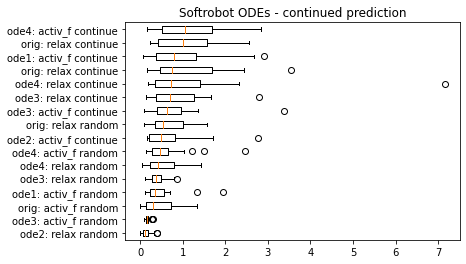

In [18]:
boxplots(both_results, 'continue')
plt.title("Softrobot ODEs - continued prediction")
plt.show()

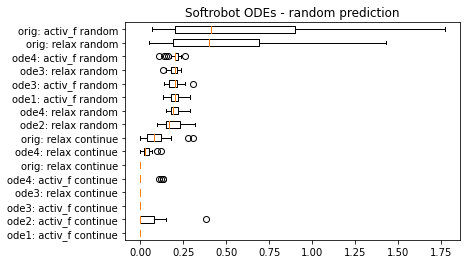

In [19]:
boxplots(both_results, 'random')
plt.title("Softrobot ODEs - random prediction")
plt.show()

In [24]:
print(all_results_dict['ode4']['activ_f']['random']['opt_parameters'])
print(all_results_dict['ode4']['activ_f']['continue']['opt_parameters'])

{'alpha': -3.3937246268548287, 'delta': 0.01, 'eigscale': -2.0, 'gamma': 15.510466806299776, 'mean_degree': 4.148966229121238, 'overlap': 0.0, 'ridge_alpha': 2.0, 'sigma': 0.8307778733041067, 'spect_rad': 1.6317344415945687, 'window': 4.839239326137129}
{'alpha': 7.370649981038427, 'delta': 1.3977305151604063, 'eigscale': 0.8995559583382746, 'gamma': 10.219099811415825, 'mean_degree': 2.262362369161984, 'overlap': 0.6, 'ridge_alpha': 2.0, 'sigma': 1.2966722270473288, 'spect_rad': 3.8188869419300944, 'window': 32.27484431926027}


In [9]:
params = ode1[0]['opt_parameters']
print(params)

{'alpha': 10.550323252963326, 'delta': 1.7628925205167023, 'gamma': 4.487323291286122, 'mean_degree': 3.1272230542791912, 'overlap': 0.3, 'ridge_alpha': 2.0, 'sigma': 5.0, 'spect_rad': 14.909137198703064, 'window': 100.37007989787946}
